# $\S$ 4.3. Linear Discriminant Analysis

[$\S$ 2.4. Decision theory for classification](/notebooks/chapter2-overview-of-supervised-learning/section4-statistical-decision-theory.ipynb) tells us that we need to know the class posteriors $\text{Pr}(G|X)$ for optimal classification. Suppose
* $f_k(x)$ is the class-conditional density of $X$ in class $G=k$,
* $\pi_k$ is the prior probability of class $k$, with $\sum\pi_k=1$.

A simple application of Bayes theorem gives us

\begin{equation}
\text{Pr}(G=k|X=x) = \frac{f_k(x)\pi_k}{\sum_{l=1}^K f_l(x)\pi_l}.
\end{equation}

We see that in terms of ability to classify, it is enough to have the $f_k(x)$.

Many techniques are based on models for the class densities:
* linear and quadratic discriminant analysis use Gaussian densities;
* more flexible mixtures of Gaussian allow for nonlinear decision boundaires ($\S$ 6.8);
* general nonparametric density estimates for each class density allow the most flexibility ($\S$ 6.6.2);
* *Naive Bayes* models are a variant of the previous case, and assume that the inputs are conditionally independent in each class; i.e., each of the class densities are products of marginal densities ($\S$ 6.6.3).

### LDA from multivariate Gaussian

Suppose that we model each class density as multivariate Gaussian

\begin{equation}
f_k(x) = \frac{1}{(2\pi)^{p/2}|\Sigma_k|^{1/2}}\exp\left\lbrace -\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k) \right\rbrace
\end{equation}

Linear discriminant analysis (LDA) arises in the special case when we assume that the classes have a common covariance matrix $\Sigma_k=\Sigma,\forall k$.

In comparing two classes $k$ and $l$, it is sufficient to look at the log-ratio, and we see that as an equation linear in $x$,

\begin{align}
\log\frac{\text{Pr}(G=k|X=x)}{\text{Pr}(G=l|X=x)} &= \log\frac{f_k(x)}{f_l(x)} + \log\frac{\pi_k}{\pi_l} \\
&= \log\frac{\pi_k}{\pi_l} - \frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k + \frac{1}{2}\mu_l^T\Sigma^{-1}\mu_l + x^T\Sigma^{-1}(\mu_k-\mu_l) \\
&= \delta_k(x) - \delta_l(x),
\end{align}

where $\delta_k$ is the *linear discriminant function*

\begin{equation}
\delta_k(x) = x^T\Sigma^{-1}\mu_k - \frac{1}{2}\mu_k^T\Sigma^{-1}\mu_k + \log\pi_k.
\end{equation}

This linear log-odds function implies that the decision boundary between classes $k$ and $l$

\begin{equation}
\left\lbrace x: \delta_k(x) - \delta_l(x) = 0 \right\rbrace
\end{equation}

is linear in $x$; in $p$ dimensions a hyperplane. Also the linear discriminant functions are equivalent description of the decision rule, with

\begin{equation}
G(x) = \arg\max_k \delta_k(x).
\end{equation}

In [1]:
"""FIGURE 4.5. An idealized example with K=3, p=2, and a common covariance

Here the right panel shows the LDA classification results instead of the
decision boundaries."""
import scipy
import scipy.linalg
import matplotlib.pyplot as plt

In [2]:
size_cluster = 30
# mat_rand = scipy.rand(2, 2)
# cov = mat_rand.T @ mat_rand / 10
cov = scipy.array([[1.0876306, 0.2065698],
                   [0.2065698, 0.1157603]])/2

cluster1 = scipy.random.multivariate_normal([-.5, 0], cov, size_cluster)
cluster2 = scipy.random.multivariate_normal([.5, 0], cov, size_cluster)
cluster3 = scipy.random.multivariate_normal([0, .5], cov, size_cluster)

# Estimating parameters
vec_mean1 = cluster1.mean(axis=0)
vec_mean2 = cluster2.mean(axis=0)
vec_mean3 = cluster3.mean(axis=0)

cluster_centered1 = cluster1 - vec_mean1
cluster_centered2 = cluster2 - vec_mean2
cluster_centered3 = cluster3 - vec_mean3
mat_cov = (cluster_centered1.T @ cluster_centered1 +
           cluster_centered2.T @ cluster_centered2 +
           cluster_centered3.T @ cluster_centered3)/(3*size_cluster-3)

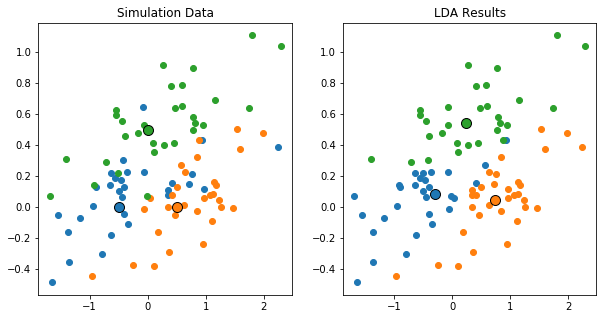

In [3]:
# Calculate linear discriminant scores
sigma_inv_mu123 = scipy.linalg.solve(
    mat_cov,
    scipy.vstack((vec_mean1, vec_mean2, vec_mean3)).T,
)
sigma_inv_mu1, sigma_inv_mu2, sigma_inv_mu3 = sigma_inv_mu123.T

mat_x = scipy.vstack((cluster1, cluster2, cluster3))
mat_delta = (mat_x @ sigma_inv_mu123 -
             scipy.array((vec_mean1 @ sigma_inv_mu1,
                          vec_mean2 @ sigma_inv_mu2,
                          vec_mean3 @ sigma_inv_mu3))/2)

cluster_classified1 = mat_x[mat_delta.argmax(axis=1) == 0]
cluster_classified2 = mat_x[mat_delta.argmax(axis=1) == 1]
cluster_classified3 = mat_x[mat_delta.argmax(axis=1) == 2]

# Plot
fig45 = plt.figure(figsize=(10, 5))
ax1 = fig45.add_subplot(1, 2, 1)
ax1.plot(cluster1[:, 0], cluster1[:, 1], 'o', color='C0')
ax1.plot(cluster2[:, 0], cluster2[:, 1], 'o', color='C1')
ax1.plot(cluster3[:, 0], cluster3[:, 1], 'o', color='C2')
ax1.plot(-.5, 0, 'o', color='C0', markersize=10, markeredgecolor='black')
ax1.plot(.5, 0, 'o', color='C1', markersize=10, markeredgecolor='black')
ax1.plot(0, .5, 'o', color='C2', markersize=10, markeredgecolor='black')
ax1.set_title('Simulation Data')

ax2 = fig45.add_subplot(1, 2, 2)
ax2.plot(cluster_classified1[:, 0], cluster_classified1[:, 1], 'o', color='C0')
ax2.plot(cluster_classified2[:, 0], cluster_classified2[:, 1], 'o', color='C1')
ax2.plot(cluster_classified3[:, 0], cluster_classified3[:, 1], 'o', color='C2')
ax2.plot(vec_mean1[0], vec_mean1[1], 'o', color='C0', markersize=10, markeredgecolor='black')
ax2.plot(vec_mean2[0], vec_mean2[1], 'o', color='C1', markersize=10, markeredgecolor='black')
ax2.plot(vec_mean3[0], vec_mean3[1], 'o', color='C2', markersize=10, markeredgecolor='black')
ax2.set_title('LDA Results')
plt.show()

### Estimating parameters

In practice we do not know the parameters of the Gaussian distributions, and will need to estimate them using our training data:
* $\hat\pi_k = N_k/N$,
* $\hat\mu_k = \sum_{g_i = k} x_i/N_k$;
* $\hat\Sigma = \sum_{k=1}^K \sum_{g_i=k}(x_i-\hat\mu_k)(x_i-\hat\mu_k)^T/(N-K)$.

### Simple correspondence between LDA and linear regression with two classes

The LDA rule classifies to class 2 if

\begin{equation}
x^T\hat\Sigma^{-1}(\hat\mu_2-\hat\mu_1) > \frac{1}{2}(\hat\mu_2+\hat\mu_1)^T\hat\Sigma^{-1}(\hat\mu_2+\hat\mu_1) - \log\frac{N_2}{N_1},
\end{equation}

and class 1 otherwise. If we code the targets in the two classees as $+1$ and $-1$ respectively, then the coefficient vector from least squares is proportional to the LDA direction shown above (Exercise 4.2). However unless $N_1=N_2$ the intercepts are different and hence the resulting decision rules are different.

If $K>2$, LDA is not the same as linear regression of the class indicator matrix, and it avoids the masking problems (Hastie et al., 1994). A correspondence can be established through the notion of *optimal scoring*, discussed in $\S$ 12.5.

### Practice beyond the Gaussian assumption

Since the derivation of the LDA direction via least squares does not use a Gaussian assumption for the features, its applicability extends beyond the realm of Gaussian data. However the derivation of the particular intercept or cut-point given in the above LDA rule *does* require Gaussian data. Thus it makes sense to instead choose the cut-point that empirically minimizes training error for a given dataset. This something we have found to work well in practive, but have not seen it mentioned in the literature.

### Quadratic Discriminant Analysis

If the $\Sigma_k$ are not assumed to be equal, then the convenient cancellations do not occur. We then get *quadratic discriminant functions* (QDA),

\begin{equation}
\delta_k(x) = -\frac{1}{2}\log|\Sigma_k| -\frac{1}{2}(x-\mu_k)^T\Sigma_k^{-1}(x-\mu_k) + \log\pi_k
\end{equation}

The decision boundary between each pair of classes $k$ and $l$ is described by a quadratic equation $\left\lbrace x: \delta_k(x) = \delta_l(x) \right\rbrace$.

In [4]:
"""FIGURE 4.6. QDA and augmented LDA

Two methods for fitting quadratic boundaries. The differences are generally
small; QDA is the preferred approach, with the LDA method a convenient
substitute."""
print('Under construction ...')

Under construction ...


This estimates for QDA are similar to those for LDA, except that separate covariance matrices must be estimated for each class. When $p$ is large this can mean a dramatic increase in parameters.

> Since the decision boundaries are functions of the parameters of the densities, counting the number of parameters must be done with care.

For LDA, it seems there are $(K-1)\times(p+1)$ paramters, since we only need the differences $\delta_k(x)-\delta_K(x)$ between the discriminant functions where $K$ is some pre-chosen class (here the last), and each difference requires $p+1$ parameters. Likewise for QDA there will be $(K-1)\times\lbrace p(p+3)/2+1 \rbrace$ parameters.

Both LDA and QDA perform well on an amazingly large and diverse set of classification tasks. See the textbook (the page 111) for the evidence (Michie et al., 1994).

### Why LDA and QDA have such a good track record?

The data are approximately Gaussian, or for LDA the covariances are approximately equal? Maybe not.

More likely a reason is that the data can only support simple decision boundaries such as linear or quadratic, and the estimates provided via the Guassian models are stable.

This is a bias-variance tradeoff -- we can put up with the bias of a linear decision boundary because it can be estimated with much lower variance than more exotic alternatives. This argument is less believable for QDA, since it can have many parameters itself, although perhaps fewer than the non-parametric alternatives.